In [15]:
import os, sys
import numpy as np
import healpy as hp
import pandas as pd
import h5py
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm

# os.system('module load texlive/2022')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times",
    "font.size"  : 13
})

# matplotlib.rcParams.update({'font.size': 15})

# matplotlib.rcParams['mathtext.fontset'] = 'stix'
#plt.rc('text.latex', preamble=r'\usepackage{/global/cfs/cdirs/lsst/groups/WL/users/yomori/repo/nulltests_txpipe/apjfonts}')
        
#plt.rcParams["font.family"] = "Times New Roman"

plt.rcParams['axes.facecolor']   = 'w'
plt.rcParams['figure.facecolor'] = 'w'

kidscol = '#9CC363'    # light olive
descol  = 'chocolate'  # dark orange
hsccol  = '#5A8BAF'    # lightpurple
cmap=cm.seismic

# KiDS-1000

In [16]:
kids = h5py.File('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/kids/kids1000_psf_catalog.h5')

In [17]:
kids['stars'].keys()

<KeysViewHDF5 ['calib_psf_reserved', 'calib_psf_used', 'dec', 'extendedness', 'fov_x', 'fov_y', 'measured_T', 'measured_T_n', 'measured_e1', 'measured_e2', 'model_T', 'model_e1', 'model_e2', 'ra']>

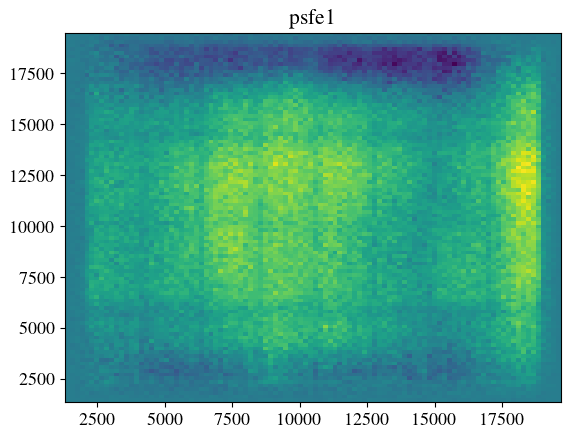

In [18]:
plt.hist2d(kids['stars/fov_x'][:],kids['stars/fov_y'],bins=(100,100),weights=kids['stars/measured_e1'][:])
plt.title('psfe1 ')
plt.show()

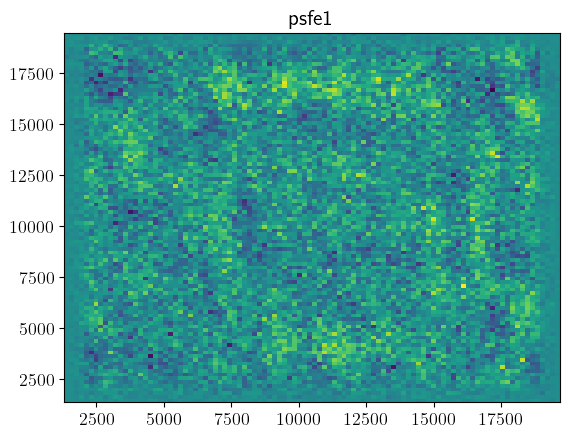

In [5]:
plt.hist2d(kids['stars/fov_x'][:],kids['stars/fov_y'],bins=(100,100),weights=kids['stars/measured_e1'][:]-kids['stars/model_e1'][:])
plt.title('psfe1')
plt.show()

In [ ]:
plt.hist2d(kids['stars/fov_x'][:],kids['stars/fov_y'],bins=(100,100),
           weights=kids['stars/measured_e2'][:])
plt.title('psfe2')
plt.show()

In [ ]:
plt.hist2d(kids['stars/fov_x'][:],kids['stars/fov_y'],bins=(100,100),
           weights=kids['stars/measured_e2'][:]-kids['stars/model_e2'][:])
plt.title('psfe2 residual')
plt.show()

In [19]:
e1 = kids['stars/measured_e1'][:]
e2 = kids['stars/measured_e2'][:]
de1 = e1 - kids['stars/model_e1'][:]
de2 = e2 - kids['stars/model_e2'][:]
T = kids['stars/measured_T'][:]
dT = T - kids['stars/model_T'][:]
fov_x = kids['stars/fov_x'][:]
fov_y = kids['stars/fov_y'][:]

weights = [e1,e2, T, de1,de2, dT]

labels = [r'$e_{1, {\rm PSF}}$',r'$e_{2, {\rm PSF}}$',r'$T_{\rm PSF}$',r'$\delta e_{1, {\rm PSF}}$',r'$\delta e_{2, {\rm PSF}}$', r'$\delta T_{\rm PSF}$'] 

In [20]:
Hnorm = []
for w in weights:
    Hw, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w)
    H, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100))
    Hnorm.append(Hw/H)
    
Vmin = [-0.04, -0.04, 0.125, -0.01, -0.01, -0.01]
Vmax = [0.04, 0.04, 0.25, 0.01, 0.01, 0.01]

/tmp/ipykernel_2266455/153034737.py:5: RuntimeWarning: invalid value encountered in divide
  Hnorm.append(Hw/H)


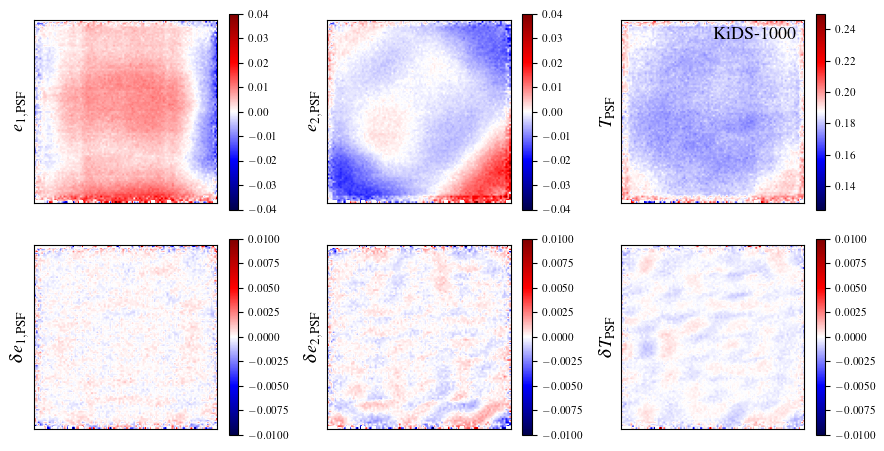

In [21]:
plt.figure(figsize=(9, 4.7))
for i in range(6):
    plt.subplot(2,3,i+1)
    im = plt.imshow(Hnorm[i],cmap=cmap, vmin=Vmin[i], vmax=Vmax[i])
    plt.ylabel(labels[i])
    plt.xticks([])
    plt.yticks([])
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=8)
# plt.suptitle('KiDS-1000')
    if i==2:
        plt.text(50,10,'KiDS-1000')
plt.tight_layout()
plt.savefig('psf_fov_kids.pdf',bbox_inches='tight')

# DES-Y3

In [22]:
des = h5py.File('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/des-y3/DES_psf_y3_catalog.hdf5','r')

In [23]:
des['stars'].keys()

<KeysViewHDF5 ['calib_psf_reserved', 'calib_psf_used', 'ccd', 'ccd_x', 'ccd_y', 'dec', 'extendedness', 'fov_x', 'fov_y', 'mag', 'measured_T', 'measured_e1', 'measured_e2', 'model_T', 'model_e1', 'model_e2', 'ra']>

In [24]:
e1 = des['stars/measured_e1'][:]
e2 = des['stars/measured_e2'][:]
de1 = e1 - des['stars/model_e1'][:]
de2 = e2 - des['stars/model_e2'][:]
T = des['stars/measured_T'][:]
dT = T - des['stars/model_T'][:]
fov_x = des['stars/fov_x'][:]
fov_y = des['stars/fov_y'][:]

weights = [e1,e2, T, de1,de2, dT]

labels = [r'$e_{1, {\rm PSF}}$',r'$e_{2, {\rm PSF}}$',r'$T_{\rm PSF}$',r'$\delta e_{1, {\rm PSF}}$',r'$\delta e_{2, {\rm PSF}}$', r'$\delta T_{\rm PSF}$'] 

In [25]:
Hnorm = []
for w in weights:
    Hw, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w)
    H, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100))
    Hnorm.append(Hw/H)
    
Vmin = [-0.04, -0.04, 0.25, -0.01, -0.01, -0.01]
Vmax = [0.04, 0.04, 0.5, 0.01, 0.01, 0.01]

/tmp/ipykernel_2266455/4135412528.py:5: RuntimeWarning: invalid value encountered in divide
  Hnorm.append(Hw/H)


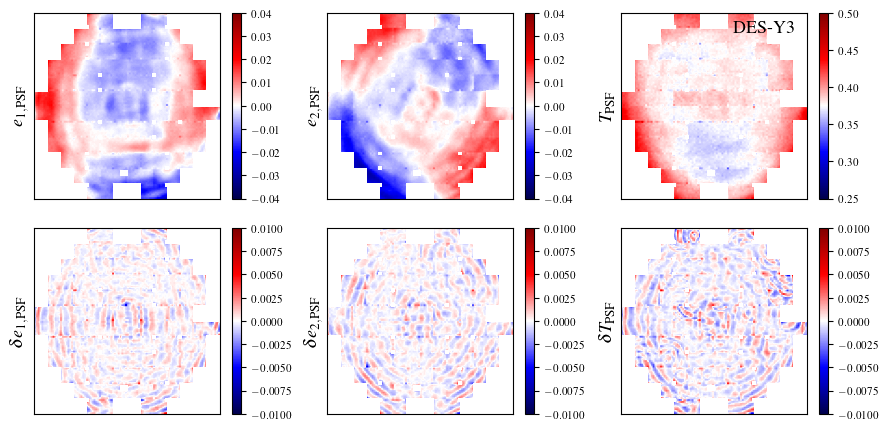

In [26]:
plt.figure(figsize=(9, 4.5))
for i in range(6):
    plt.subplot(2,3,i+1)
    im = plt.imshow(Hnorm[i],cmap=cmap, vmin=Vmin[i], vmax=Vmax[i])
    plt.ylabel(labels[i])
    plt.xticks([])
    plt.yticks([])
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=8)
    if i==2:
        plt.text(60,10,'DES-Y3')

plt.tight_layout()

plt.savefig('psf_fov_des.pdf',bbox_inches='tight')

##### 